In [1]:
import csv
import pandas as pd
import numpy as np
import random

In [2]:
file = 'C:/Users/anna/Desktop/maria/Upwork/ML courses/Sample_Data.xlsx'
df = pd.read_excel(file, encoding="utf8")

In [3]:
#print(df.dtypes)

In [4]:
# Drop missing rows
df.dropna()

,ID number,Outcome,Time,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.19260,0.31400,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.34490,0.34140,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,...,107.30,733.2,0.17060,0.41960,0.59990,0.17090,0.3485,0.11790,2.5,0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.12130,...,152.60,1593.0,0.11440,0.33710,0.29900,0.19220,0.2726,0.09581,1.5,?
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,4.0,10
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,2.0,1
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,6.0,20


We will keep only the numerical part of the dataframe (Features) so that we ensure all values are numerical and if not, clean
the non-numerical data by deleting the corresponding rows

In [5]:
temp = df.iloc[:,2:36]
print(temp)

     Time  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0      31      18.02      27.60     117.50     1013.0    0.09489    0.10360   
1      61      17.99      10.38     122.80     1001.0    0.11840    0.27760   
2     116      21.37      17.44     137.50     1373.0    0.08836    0.11890   
3     123      11.42      20.38      77.58      386.1    0.14250    0.28390   
4      27      20.29      14.34     135.10     1297.0    0.10030    0.13280   
5      77      12.75      15.29      84.60      502.7    0.11890    0.15690   
6      60      18.98      19.61     124.40     1112.0    0.09087    0.12370   
7      77      13.71      20.83      90.20      577.9    0.11890    0.16450   
8     119      13.00      21.82      87.50      519.8    0.12730    0.19320   
9      76      12.46      24.04      83.97      475.9    0.11860    0.23960   
10    123      16.02      23.24     102.70      797.8    0.08206    0.06669   
11    125      15.78      17.89     103.60      781.

In [6]:
# Check if all rows are real numbers. Initially, it checks per element (applymap) and it returns True only if the whole row
# is True (all(1))
b = temp.applymap(np.isreal).all(1)
b.columns = ['truth']
print(b)

0       True
1       True
2       True
3       True
4       True
5       True
6      False
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28     False
29      True
       ...  
168     True
169     True
170     True
171     True
172     True
173     True
174     True
175     True
176     True
177     True
178     True
179     True
180     True
181     True
182     True
183     True
184     True
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
193     True
194     True
195     True
196    False
197     True
Length: 198, dtype: bool


In [7]:
idx = []     # this list will contain the row indices that are False
for i in range(len(b)): 
    # check if rows are True and if False, append the index in the list
    if not b.iloc[i]:
        idx.append(i)

In [8]:
# Delete these row indexes from the initial dataFrame (df)
df.drop(df.index[idx], inplace=True)

In [9]:
# Assert that we have only N or R in the outcome column
outcomes = ['N','R']
ind = df['Outcome'].isin(outcomes).all()
print(ind)

True


In order to be compatible with the mxnet, we will convert the objects (N and R strings) to floats. We assign 0.0 for 
non-recurrent and 1.0 for recurrent. But first, we need to check if there is any patient that recurred in more than a year (365 days). Because we are interested in predicting if a patient recurred in less than a year, we consider patients who recurred
after a year as non-recurrent ('N)

In [10]:
# Convert objects to numerical and also check if a patient recurred after 365 days
df['N_outcome'] = [1.0 if (x =='R'and y<365) else 0.0 for x,y in zip(df['Outcome'],df['Time'])] 

In [11]:
print(df)

     ID number Outcome  Time  Feature 1  Feature 2  Feature 3  Feature 4  \
0       119513       N    31      18.02      27.60     117.50     1013.0   
1         8423       N    61      17.99      10.38     122.80     1001.0   
2       842517       N   116      21.37      17.44     137.50     1373.0   
3       843483       N   123      11.42      20.38      77.58      386.1   
4       843584       R    27      20.29      14.34     135.10     1297.0   
5       843786       R    77      12.75      15.29      84.60      502.7   
7       844582       R    77      13.71      20.83      90.20      577.9   
8       844981       N   119      13.00      21.82      87.50      519.8   
9       845010       N    76      12.46      24.04      83.97      475.9   
10      845636       N   123      16.02      23.24     102.70      797.8   
11      846100       N   125      15.78      17.89     103.60      781.0   
12      846381       N   117      15.85      23.95     103.70      782.7   
13      8479

In [12]:
print(int(len(df)/2))

97


In [13]:
# Shuffle dataframe to achieve random R-N distribution
from sklearn.utils import shuffle
from sklearn import preprocessing
df = shuffle(df)    

In [14]:
# train - test set 50%-50%
train_set, test_set = df[(int(len(df)/2)):],df[:(int(len(df)/2))]

In [15]:
print(test_set)

     ID number Outcome  Time  Feature 1  Feature 2  Feature 3  Feature 4  \
164     916799       N    40      18.31      20.58     120.80     1052.0   
188     938413       N    15      12.53      30.98      80.41      490.9   
52      862717       N    68      14.19      26.02      96.29      632.4   
101     884180       N    62      19.40      23.50     129.10     1155.0   
75      873592       R    17      27.22      21.87     182.10     2250.0   
147     908489       R     9      13.98      19.62      91.12      599.5   
135    9012000       R     2      22.01      21.90     147.20     1482.0   
46      859983       R    26      13.80      15.79      90.43      584.1   
192    9411300       N     3      14.72      25.26      99.28      657.5   
13      847990       R    36      14.54      27.54      96.73      658.8   
95     8812877       N    68      16.34      20.81     109.40      829.8   
117      89122       N    17      19.71      19.06     129.50     1192.0   
57       865

In [16]:
# features in the training set
X_train = train_set.iloc[:,2:35]

Normalization of the train and test features found to be a really crucial step, as otherwise, the Neural netowrk was
unable to really understand the relationship between features and labels, so the predictions were unreliable.
Thus, we perform standard normalization on X_train and X_test (features)

In [17]:
#normalization
x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

In [18]:
print(X_train)

          0         1         2         3         4         5         6   \
0   0.081967  0.603801  0.348659  0.572650  0.499179  0.441274  0.272233   
1   0.737705  0.206140  0.507024  0.200107  0.143552  0.662061  0.272233   
2   0.122951  0.497076  0.751384  0.485043  0.391562  0.361220  0.290752   
3   0.590164  0.212719  0.278842  0.203632  0.137236  0.400721  0.370740   
4   0.532787  0.673246  0.395062  0.632479  0.576228  0.064284  0.110446   
5   0.508197  0.714912  0.882929  0.681624  0.667803  0.281916  0.223374   
6   0.245902  0.241228  0.482759  0.232158  0.171403  0.335086  0.205642   
7   0.295082  0.456140  0.497659  0.424145  0.357901  0.320517  0.127428   
8   0.393443  0.332602  0.455513  0.331197  0.278830  0.541904  0.392017   
9   0.811475  0.377193  0.326522  0.354701  0.285083  0.319766  0.221009   
10  0.491803  0.693713  0.485313  0.661325  0.588228  0.234004  0.218645   
11  0.131148  0.513889  0.578118  0.513889  0.400025  0.597477  0.458213   
12  0.098361

In [19]:
#labels of the training set
Y_train = train_set.iloc[:,35]

In [20]:
X_test= test_set.iloc[:,2:35]

In [21]:
#normalization
x = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test = pd.DataFrame(x_scaled)

In [22]:
Y_test = test_set.iloc[:,35]

In [23]:
# we need to convert the dataframes in np.arrays and float 32
# this is the form that mxnet is able to process
Xtrain, Ytrain = np.array(X_train), np.array(Y_train)
Xtrain, Ytrain = Xtrain.astype('float32'), Ytrain.astype('float32')

In [24]:
Xtest, Ytest = np.array(X_test), np.array(Y_test)
Xtest, Ytest = Xtest.astype('float32'), Ytest.astype('float32')

In [25]:
# Make sure that we have the correct datatypes
print(Xtrain.dtype)
print(type(Xtrain))

float32
<class 'numpy.ndarray'>


In [26]:
print(Xtest.dtype)
print(type(Xtest))

float32
<class 'numpy.ndarray'>


In [27]:
import numpy as np
import mxnet as mx
import d2l
from mxnet import nd, autograd, gluon, np, npx

In [28]:
npx.set_np()
ctx = mx.gpu() if mx.test_utils.list_gpus() else mx.cpu()
data_ctx = ctx
model_ctx = ctx

In [29]:
batch_size = 10
# we have 2 outputs, corresponding to 'recur' and 'non-recur'
num_outputs = 2
num_examples = 194

train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(Xtrain, Ytrain),
                                      batch_size=batch_size, shuffle=True)

test_data = gluon.data.DataLoader(gluon.data.ArrayDataset(Xtest, Ytest),
                                      batch_size=batch_size, shuffle=True)


We are trying different architectures by changing number of layers and number of neurons per layer.
As an activation function, sigmoid and relu were used. Sigmoid was returning a 'smoother' loss curve.
Relu needed less epochs in order to converge to an acceptably small loss.

Most of our study used learning reate: 0.01, 10 epochs, but as soon as we chose the network architecture, we tried to 
refine it by reducing learning rate and/or increasing epochs. Larger epochs helped the loss drop faster, but the train and test accuracy remained unchangable. On the other hand, when decreasing learning rate (around 1e-6), the loss was declining linearly,
but we could observe a variation in the train and test accuracy. In the end, we need to accept this tradeoff in our implementation.

From the different architectures, we observed that less neurons per layer lead to a better performance (smaller loss and
faster loss drop).

Adding a 3rd layer gave better results in the cases of 16 and 64 nodes, but the performance regraded fast when going up to 
256 neurons, as the loss reached infinity! Keeping the 16 nodes per layer, when we added a 4th layer, the performance did not
change significantly. Therefore, the chosen architecture is 3 layers - 16 nodes/layer.

In [30]:
num_hidden = 16
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Dense(num_hidden, activation="relu"))
    net.add(gluon.nn.Dense(num_hidden, activation="relu"))
    net.add(gluon.nn.Dense(num_hidden, activation="relu"))
    net.add(gluon.nn.Dense(num_outputs))

In [31]:
net.collect_params().initialize(mx.init.Normal(sigma=.1), ctx=model_ctx)

In [32]:
# loss function for classification
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

In [33]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 1e-5})

In [34]:
def evaluate_accuracy(data_iterator, net):
    acc = mx.metric.Accuracy()
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx)
        output = net(data)
        predictions = nd.argmax(output.as_nd_ndarray(), axis=1)
        acc.update(preds=predictions, labels=label)
    return acc.get()[1]

In [35]:
epochs = 20
smoothing_constant = .01
loss_sequence = []
train_acc = []
test_acc = []

In [36]:
for e in range(epochs):
    cumulative_loss = 0
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx)
        label = label.asnumpy()
        label = nd.array(label)
        label_one_hot = nd.one_hot(label.as_nd_ndarray(), 1)
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output.as_np_ndarray(), label_one_hot.as_np_ndarray())
        loss.backward()
        trainer.step(data.shape[0])
        cumulative_loss += nd.sum(loss.as_nd_ndarray()).asscalar()


    test_accuracy = evaluate_accuracy(test_data, net)
    train_accuracy = evaluate_accuracy(train_data, net)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %
          (e, cumulative_loss/num_examples, train_accuracy, test_accuracy))
    
    loss_sequence.append(cumulative_loss)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

Epoch 0. Loss: 0.3467112398639168, Train_acc 0.5773195876288659, Test_acc 0.5670103092783505
Epoch 1. Loss: 0.3467032270333202, Train_acc 0.5567010309278351, Test_acc 0.5463917525773195
Epoch 2. Loss: 0.3466953567622863, Train_acc 0.5463917525773195, Test_acc 0.5463917525773195
Epoch 3. Loss: 0.3466875356497224, Train_acc 0.5463917525773195, Test_acc 0.5257731958762887
Epoch 4. Loss: 0.3466795596879782, Train_acc 0.5154639175257731, Test_acc 0.5154639175257731
Epoch 5. Loss: 0.34667136005519594, Train_acc 0.5051546391752577, Test_acc 0.4845360824742268
Epoch 6. Loss: 0.346663236618042, Train_acc 0.5154639175257731, Test_acc 0.4948453608247423
Epoch 7. Loss: 0.34665536634700816, Train_acc 0.4948453608247423, Test_acc 0.4845360824742268
Epoch 8. Loss: 0.3466475304869032, Train_acc 0.4948453608247423, Test_acc 0.4845360824742268
Epoch 9. Loss: 0.34663927186395704, Train_acc 0.4948453608247423, Test_acc 0.4845360824742268
Epoch 10. Loss: 0.3466312934442894, Train_acc 0.4845360824742268, Te

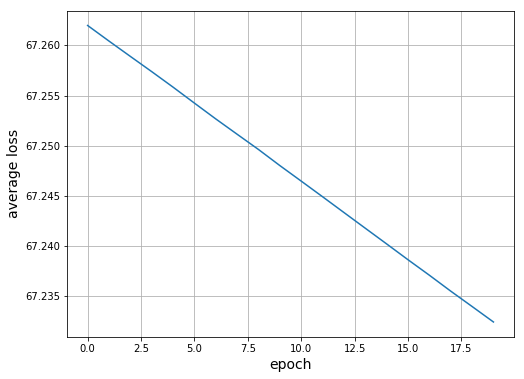

In [37]:
# plot the convergence of the estimated loss function
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence, label = 'loss')

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('average loss',fontsize=14)
plt.show()

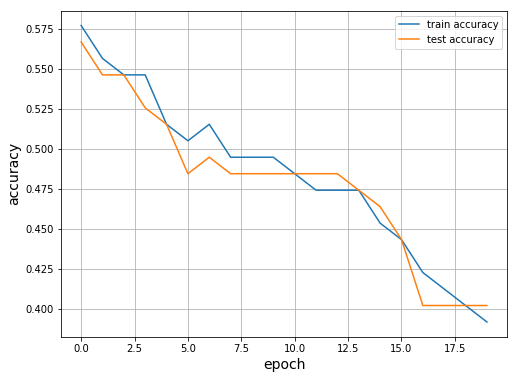

In [38]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(train_acc, label = 'train accuracy')
plt.plot(test_acc, label = 'test accuracy')
plt.legend()

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.show()

It is normal to see the training and test accuracy fluctuate in a classificaiton problem, as there is always the possibility of wrong guesses. Train and test accuracy curves are very close each other, so we are not signifantly neither overfitting nor underfitting.

In [141]:
# Define the function to do prediction
def model_predict(net,data):
    output = net(data)
    res = nd.argmax(output.as_nd_ndarray(), axis=1)
    return res

In [142]:
samples = 10

# let's sample 10 random data points from the test set
for i, (data, label) in enumerate(test_data):
    data = data.as_in_context(model_ctx)
    pred=model_predict(net,data)
    print(label)
    break

[0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
